# Class 9 

# More Pandas : 

# Time Series 

As we talked about during last week’s class Pandas is a very rich package that enables us to conduct many types of analysis, wrangling and visualizations. Working with data, formats like CSV’s , Geojsons and Shapefiles is made easy and so much less intimidating by the use of a few pretty simple command lines! 

Last week we have seen that functions like summarizing, describing as well as making changes in the initial data are very straight forward in Pandas.

Today, we will learn how to use more Pandas' functionalities. We will use these in conjunction with other packages as well as with other Pandas functionalists we used last week. Acknowledging that things are intertwined, in the next few weeks we will build our knowledge of working with different Python packages. We will also use more and more functionalities and commands with time while also using the simple functions. This method will hopefully help us build strong data analytics programming knowledge that you can use in your future academic studies and careers 📊📈

In [1]:
#runing packages 
import pandas as pd #<-- we know this one 
import numpy as np
import matplotlib #<-- for viz
import matplotlib.pyplot as plt#<-- for viz
from datetime import datetime #<-- note this one is for our time series analysis 
import seaborn as sns 

Note about the data: the first data we will be working on is about year old, and therefore the number of days and cases is reflected in it. The second data will be the same data as last week (NYT) but updated to a few days ago.

### Data: 

Today we will work with a world wide data about COVID-19 from "Our World in Data: https://ourworldindata.org
 

In [2]:
#first load all cases csv: 

all_cases = pd.read_csv('total_cases.csv')

In [3]:
# let's get some basic info: 
all_cases.tail()

,date,World,Afghanistan,Albania,Algeria,Andorra,Angola,Anguilla,Antigua and Barbuda,Argentina,...,United Kingdom,United States,United States Virgin Islands,Uruguay,Uzbekistan,Vatican,Venezuela,Vietnam,Zambia,Zimbabwe
90,2020-03-30,715353,114.0,212.0,454.0,334.0,7.0,2.0,7.0,820.0,...,19522,143025,30.0,309.0,145.0,6.0,119.0,228.0,29.0,7.0
91,2020-03-31,777796,141.0,223.0,511.0,370.0,7.0,2.0,7.0,966.0,...,22141,164620,NaN,320.0,149.0,6.0,135.0,229.0,35.0,7.0
92,2020-04-01,851308,166.0,243.0,584.0,376.0,7.0,2.0,7.0,966.0,...,25150,189618,30.0,338.0,173.0,6.0,135.0,229.0,35.0,8.0
93,2020-04-02,928436,192.0,259.0,847.0,390.0,8.0,2.0,7.0,1133.0,...,29474,216721,30.0,338.0,187.0,6.0,143.0,235.0,36.0,8.0
94,2020-04-03,1000249,235.0,277.0,847.0,428.0,8.0,3.0,9.0,1133.0,...,33718,245540,33.0,369.0,190.0,6.0,144.0,239.0,39.0,8.0


In [4]:
all_cases.shape

(95, 205)

There are 95 rows (days) and rows, which are 205 countries in total 

## Task 1: 

## a.
    
 What is the total number of cases in:
 - Argentina
 - United Kingdom 
 - Italy 
 - Spain 
 - United States
 
  
   
   Hint: remember that the last day in this data is April 3rd 2020 and that the data is accumlated day by day

In [5]:
#your code here: 
(all_cases.Argentina.max())

1133.0

In [6]:
(all_cases['United Kingdom'].max())

33718

In [7]:
(all_cases.Italy.max())

115242

In [8]:
(all_cases.Spain.max())

110238

In [9]:
(all_cases['United States'].max())

245540

## b. What is the ratio of total cases between:
* Brazil and France 
* South Africa and United Kingdom 

In [10]:
(all_cases.France.max())/(all_cases.Brazil.max())

7.472187104930468

In [11]:
(all_cases['South Africa'].max())/(all_cases['United Kingdom'].max())

0.04335962987128537

In [12]:
# transpose the data:
# april3T = april3rd.T
# april3T[4:10]


### Now let's create some visualizations 

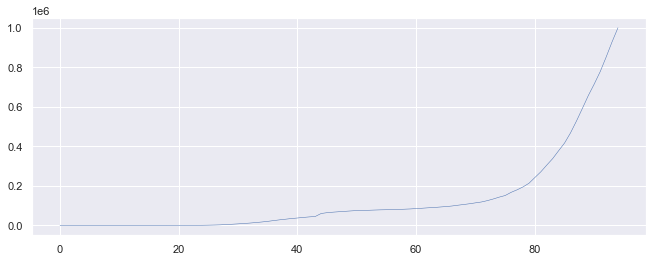

In [13]:
#first let's start with an overall world trend
sns.set(rc={'figure.figsize':(11, 4)})
all_cases['World'].plot(linewidth=0.5);

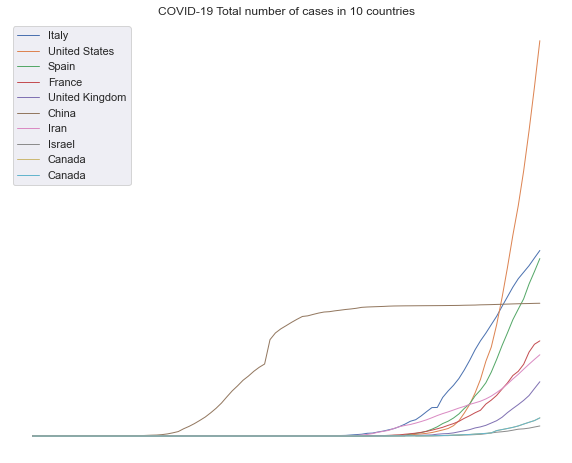

In [14]:
#set the figure size
sns.set(rc={'figure.figsize':(10, 8)})
#visualize countries:
all_cases['Italy'].plot(linewidth=1);
all_cases['United States'].plot(linewidth=1);
all_cases['Spain'].plot(linewidth=1);
all_cases['France'].plot(linewidth=1);
all_cases['United Kingdom'].plot(linewidth=1);
all_cases['China'].plot(linewidth=1);
all_cases['Iran'].plot(linewidth=1);
all_cases['Israel'].plot(linewidth=1);
all_cases['Canada'].plot(linewidth=1);
all_cases['Canada'].plot(linewidth=1);

#add legend:
plt.legend(loc="upper left")

#remove the grid and axis 
plt.axis('off')

#add title
plt.title('COVID-19 Total number of cases in 10 countries')

plt.show()

# Time Series 

Time series data is a useful form of data for many fields like climate change, finance, and urban informatics as well as many many others! The importance of time series data stems from the value that comes from understanding how things change over time. This temporal dimension means we need to have data that appears in *regular* intervals in order to treat it as time series. In the age of big data we often see data that is recorded (usually by sensors) in very small intervals, every second or every minute. By being able to conduct time series analysis we can smooth the data and understand it on a higher level. 


To get started with we will first look for the a time stamp in our data. In our data, as well as others the *data* column will be the one to look into. 

In [15]:
all_cases.tail()

,date,World,Afghanistan,Albania,Algeria,Andorra,Angola,Anguilla,Antigua and Barbuda,Argentina,...,United Kingdom,United States,United States Virgin Islands,Uruguay,Uzbekistan,Vatican,Venezuela,Vietnam,Zambia,Zimbabwe
90,2020-03-30,715353,114.0,212.0,454.0,334.0,7.0,2.0,7.0,820.0,...,19522,143025,30.0,309.0,145.0,6.0,119.0,228.0,29.0,7.0
91,2020-03-31,777796,141.0,223.0,511.0,370.0,7.0,2.0,7.0,966.0,...,22141,164620,NaN,320.0,149.0,6.0,135.0,229.0,35.0,7.0
92,2020-04-01,851308,166.0,243.0,584.0,376.0,7.0,2.0,7.0,966.0,...,25150,189618,30.0,338.0,173.0,6.0,135.0,229.0,35.0,8.0
93,2020-04-02,928436,192.0,259.0,847.0,390.0,8.0,2.0,7.0,1133.0,...,29474,216721,30.0,338.0,187.0,6.0,143.0,235.0,36.0,8.0
94,2020-04-03,1000249,235.0,277.0,847.0,428.0,8.0,3.0,9.0,1133.0,...,33718,245540,33.0,369.0,190.0,6.0,144.0,239.0,39.0,8.0


Yes, 'date' does seem to be our time column.

In [16]:
all_cases['date']

0     2019-12-31
1     2020-01-01
2     2020-01-02
3     2020-01-03
4     2020-01-04
         ...    
90    2020-03-30
91    2020-03-31
92    2020-04-01
93    2020-04-02
94    2020-04-03
Name: date, Length: 95, dtype: object

In [17]:
#now let's check the dtypes for the "date" column
all_cases.dtypes

date            object
World            int64
Afghanistan    float64
Albania        float64
Algeria        float64
                ...   
Vatican        float64
Venezuela      float64
Vietnam        float64
Zambia         float64
Zimbabwe       float64
Length: 205, dtype: object

We see ״date״ is object type, we'd need to transform it to a datetime format so that Python will know how to read it using time series analysis. 

# Converting the ״Date״ column into a datetime format
Here are some of the Datetime formats for future reference: 
- %Y four digit year (e.g. 2019)
- %y two-digit year  (w.g. 19)
- %m two-digit month  (e.g. 03, 05)
- %H hour, 24-hour clock (e.g. 23, 00)
- %I hour, 12 hour clock (e.g. 11,12)
- %M two-digit minute (e.g. 00,59)
- %S seconds (e.g. 00,01)
- %w weekday as integer (e.g. 0 for sunday)
- %U week # (in a year) when Sunday is the 1st day
- %W week # (in the year) when Monday is the 1st day in a week
- %z UTC time Zone
- %F shortcut for %Y-%m-%d which is a very common datetime (e.g. 2020-04-04)
- %D shortcus for another common structure: %m/%d/%y (e.g. 04/04/20)

Source: Python for Data Analysis by Wes McKinney

In [18]:
#the Datetime package has calender realted functions, for exmaple, it can tell you the time right now:
datetime.now()

datetime.datetime(2021, 5, 3, 22, 26, 5, 960119)

In [19]:
# you can also calculate number of days between two dates: 
datetime(2020,12,7)-datetime(2019,10,8)

datetime.timedelta(days=426)

looking into our "date" column we see that ours is structured as follows: year(4 digits)-month-day. So if we look into the datetime formates above, we see that in Datetime language, we can translate it into: %Y-%m-%d OR %F



In [20]:
#Now for us to be able to change the date column into a datetime, we need to understand the format. 
#let's transform the date column from string into datetime format
all_cases['date'] = pd.to_datetime(all_cases['date'], format="%Y-%m-%d")

In [21]:
#now let's run this command again and see if our reformating worked
all_cases.dtypes

date           datetime64[ns]
World                   int64
Afghanistan           float64
Albania               float64
Algeria               float64
                    ...      
Vatican               float64
Venezuela             float64
Vietnam               float64
Zambia                float64
Zimbabwe              float64
Length: 205, dtype: object

We see indeed that the "date" column has not been changed to a datetime type. 


Note that time series behaves like any other pandas series so we can do stuff like:

In [22]:
all_cases['date'].tail()

90   2020-03-30
91   2020-03-31
92   2020-04-01
93   2020-04-02
94   2020-04-03
Name: date, dtype: datetime64[ns]

In [23]:
all_cases['date'].min()

Timestamp('2019-12-31 00:00:00')

In [24]:
all_cases['date'].max()

Timestamp('2020-04-03 00:00:00')

In [25]:
len(all_cases['date'])

95

## Why should we be "smoothing" data?

One of the reasons time series data is very useful is due to the "smoothing" of data. Smoothing a dataset means removing outliers and seeing the general trend rather than the value for each single datapoint or to remove the "noise". Smoothing the data helps create data that is easier to use later on for creating predictions becuase it makes patterns more noticable.  

There are a few different ways to smooth data. Today we will look into a very common method for smoothing--rolling mean (AKA moving windows). 

## Rolling Mean

Rolling means are a way to calculate **local** averages for the purpose of smoothing the data. 

In this method, instead of calculating one average for the entire data, the average is calcualted in constant intervals. Using rolling means in time series is very common. The main reason is that timeseries include a large amount of observations. By displaying rolling means instead of the actual data, we can show trends. 

In statistics, rolling means are used for predictions (e.g. ARIMA). We will not touch upon this topic today. 

Let's calculate rolling means for our covid data. For covid cases smooothing the data is particularly important, becuase there are many reasons for small fluctuations in the data day-by-day (e.g. some clinics are not open over weekends and holidays and many people tend to go get tested just before holidays if they plan to visit family for example). Therefore, getting a smoother understanding of the trends in the data helps us eliminate some of those biases and human beahviors. 

In [26]:
# let's calculate the rolling mean for the United States cases 

# here I am creating the local mean for intervals of 4 (in our case every 4 days). 
#In larger datasets we might apply larger intervals 
all_cases['USrolling_mean'] = all_cases['United States'].rolling(7, center=True).mean()
# now let's view our new column  
all_cases['USrolling_mean'].tail()

90    147046.571429
91    169839.285714
92              NaN
93              NaN
94              NaN
Name: USrolling_mean, dtype: float64

In [27]:
#let's look into the rolling mean column in comparison to the actual cases per data:
print ('US cases', all_cases['United States'][30:34])
print ('Rolling mean in the US', all_cases['USrolling_mean'][30:34])

US cases 30    5
31    6
32    7
33    8
Name: United States, dtype: int64
Rolling mean in the US 30    5.857143
31    6.714286
32    7.571429
33    8.428571
Name: USrolling_mean, dtype: float64


We see that these are both mostly similiar, but that the rolling mean is "moving" a little slower. 
Let's visualize both the number of cases per day and the rolling mean for the US:

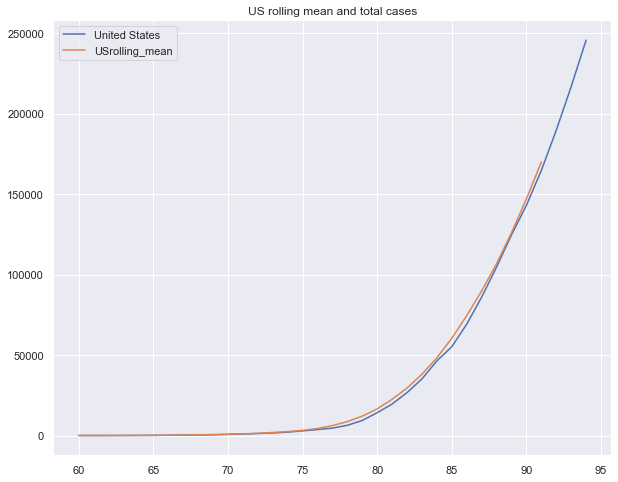

In [28]:
sns.set(rc={'figure.figsize':(10, 8)})
#all_cases['World'].plot(linewidth=0.5);
#all_cases['Vietnam'].plot(linewidth=0.5);

all_cases['United States'][60:].plot(linewidth=1.5);
all_cases['USrolling_mean'][60:].plot(linewidth=1.5);
plt.legend(loc="upper left")
plt.title('US rolling mean and total cases')


plt.show()


In [29]:
# let's do the same for other countries
all_cases['Italyrolling_mean'] = all_cases['Italy'].rolling(7, center=True).mean()
all_cases['Chinarolling_mean'] = all_cases['China'].rolling(7, center=True).mean()
all_cases['Iranrolling_mean'] = all_cases['Iran'].rolling(7, center=True).mean()
all_cases['UKrolling_mean'] = all_cases['United Kingdom'].rolling(7, center=True).mean()


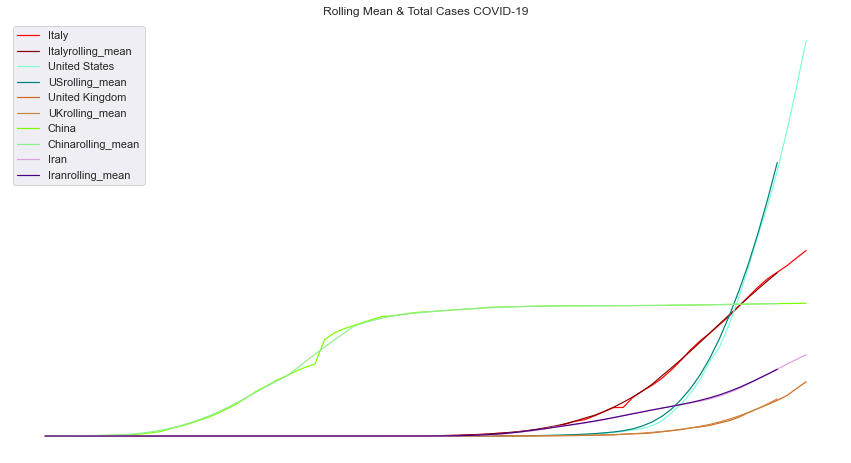

In [30]:
sns.set(rc={'figure.figsize':(15, 8)})


#italy
all_cases['Italy'][15:].plot(linewidth=1.2, c='red');
all_cases['Italyrolling_mean'][15:].plot(linewidth=1.2, c='darkred');

#US
all_cases['United States'][15:].plot(linewidth=1.2, c='aquamarine');
all_cases['USrolling_mean'][15:].plot(linewidth=1.2, c='teal');

#uk
all_cases['United Kingdom'][15:].plot(linewidth=1.2, c='chocolate');
all_cases['UKrolling_mean'][15:].plot(linewidth=1.2, c='peru');

#china
all_cases['China'][15:].plot(linewidth=1.2, c='lawngreen');
all_cases['Chinarolling_mean'][15:].plot(linewidth=1.2, c='lightgreen');

#iran
all_cases['Iran'][15:].plot(linewidth=1.2, c='plum');
all_cases['Iranrolling_mean'][15:].plot(linewidth=1.2, c='indigo');

#add title
plt.title('Rolling Mean & Total Cases COVID-19')

#add legend
plt.legend(loc="upper left")

#remove axis
plt.axis('off')

plt.show()



Note that I used two tones of the same color for each country's number of cases and its rolling mean. As the legend indicates, the lighter color is represents the actual cases, and the lighter color represents the rolling mean. 

### So what is "moving" in the rolling mean? 

The "moving" refers to the window width defined by us which is measured by the number of obsservations (days).

**One lmitiation with our data is that it shows seasonality (first wave, winter wave etc), which actually is a violation of the rolling mean.**

# Rolling Mean on NYT data
Now let's try the same tool for 
The NYT data we used last week:. Last updated on April 5th
https://github.com/nytimes/covid-19-data

In [34]:
US_cases = pd.read_csv('us-states.csv')

In [35]:
US_cases.head()

,date,state,fips,cases,deaths
0,2020-01-21,Washington,53,1,0
1,2020-01-22,Washington,53,1,0
2,2020-01-23,Washington,53,1,0
3,2020-01-24,Illinois,17,1,0
4,2020-01-24,Washington,53,1,0


In [36]:
covidNY = US_cases[US_cases['state']== 'New York']

In [37]:
#once again creating a new column to count number of new cases per day
new_cases = []
previous_count = 0
for i in range(len(covidNY.cases)):
    current_count = covidNY.cases.iloc[i]
    new_cases.append(current_count - previous_count)
    previous_count = current_count
    
#and add it as a column 

covidNY['new_cases'] = new_cases

<ipython-input-37-7cb87cd57203>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covidNY['new_cases'] = new_cases


In [38]:
new_deaths = []
previous_count = 0
for i in range(len(covidNY.deaths)):
    current_count = covidNY.deaths.iloc[i]
    new_deaths.append(current_count - previous_count)
    previous_count = current_count
    
covidNY['new_deaths'] = new_deaths

<ipython-input-38-bd03796f54f3>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covidNY['new_deaths'] = new_deaths


In [52]:
covidNY.tail(10)

,date,state,fips,cases,deaths,new_cases,new_deaths
22542,2021-04-16,New York,36,1984884,50965,6290,53
22597,2021-04-17,New York,36,1991271,51034,6387,69
22652,2021-04-18,New York,36,1996876,51077,5605,43
22707,2021-04-19,New York,36,2002053,51122,5177,45
22762,2021-04-20,New York,36,2006712,51183,4659,61
22817,2021-04-21,New York,36,2010967,51228,4255,45
22872,2021-04-22,New York,36,2016244,51299,5277,71
22927,2021-04-23,New York,36,2021094,51361,4850,62
22982,2021-04-24,New York,36,2025257,51419,4163,58
23037,2021-04-25,New York,36,2029307,51471,4050,52


# Task 2: 
## a. 
- What was the largest number of cases and deaths in one day in NYS?
- In which dates were these numbers recorded? 

## b. 
- Which state/s have the largest cumulative number of cases and deaths? 

In [98]:
print('Largest Number of Cases in One Day in NYS & Date')
covidNY.sort_values(by='new_cases', ascending=True).tail(1)

Largest Number of Cases in One Day in NYS & Date


,date,state,fips,cases,deaths,new_cases,new_deaths
21277,2021-03-24,New York,36,1814919,49231,20184,254


In [97]:
print('Largest Number of Deaths in One Day in NYS & Date')
covidNY.sort_values(by='new_deaths', ascending=True).tail(1)

Largest Number of Deaths in One Day in NYS & Date


,date,state,fips,cases,deaths,new_cases,new_deaths
1972,2020-04-07,New York,36,141703,7185,8314,1036


In [114]:
US_cases.sort_values(by='cases', ascending=True).tail(10)

,date,state,fips,cases,deaths
22513,2021-04-16,California,6,3714406,60883
22568,2021-04-17,California,6,3716623,60949
22623,2021-04-18,California,6,3718233,60994
22678,2021-04-19,California,6,3720790,61006
22733,2021-04-20,California,6,3723271,61083
22788,2021-04-21,California,6,3725195,61170
22843,2021-04-22,California,6,3727711,61261
22898,2021-04-23,California,6,3729952,61361
22953,2021-04-24,California,6,3730326,61399
23008,2021-04-25,California,6,3731677,61434


In [115]:
US_cases.sort_values(by='deaths', ascending=True).tail(10)

,date,state,fips,cases,deaths
22513,2021-04-16,California,6,3714406,60883
22568,2021-04-17,California,6,3716623,60949
22623,2021-04-18,California,6,3718233,60994
22678,2021-04-19,California,6,3720790,61006
22733,2021-04-20,California,6,3723271,61083
22788,2021-04-21,California,6,3725195,61170
22843,2021-04-22,California,6,3727711,61261
22898,2021-04-23,California,6,3729952,61361
22953,2021-04-24,California,6,3730326,61399
23008,2021-04-25,California,6,3731677,61434


In [120]:
print('State with the Largest Cumulative Number of Cases and Deaths')
print('California')

State with the Largest Cumulative Number of Cases and Deaths
California


# Time series for NY data:

Similiar to the world data let's visualize the NY data as time series: 

In [114]:
#how many days in the data?
len(covidNY)

27

In [115]:
# tranform data column into datetime
#let's transform the date column into datetime format
covidNY['date'] = pd.to_datetime(covidNY['date'], format="%Y-%m-%d")

<ipython-input-115-98069bf30251>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covidNY['date'] = pd.to_datetime(covidNY['date'], format="%Y-%m-%d")


In [116]:
covidNY.dtypes

date          datetime64[ns]
state                 object
fips                   int64
cases                  int64
deaths                 int64
new_cases              int64
new_deaths             int64
dtype: object

In [117]:
#make sure it works: 

covidNY['date'].dtypes

dtype('<M8[ns]')

In [118]:
covidNY['NYrolling_mean'] = covidNY['cases'].rolling(4, center=True).mean()
covidNY['NYrolling_mean'].tail()

<ipython-input-118-5e1b5d0674f7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covidNY['NYrolling_mean'] = covidNY['cases'].rolling(4, center=True).mean()


1152    18016.00
1206    23693.50
1260    29648.25
1314    35588.25
1367         NaN
Name: NYrolling_mean, dtype: float64

(189.95, 1423.05, -2230.7000000000003, 46866.7)

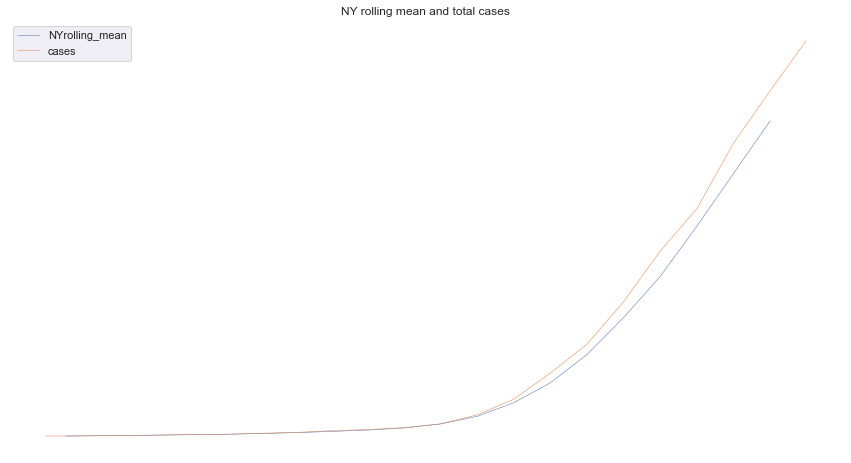

In [119]:
#visualize NY rolling mean and total cases: 
covidNY['NYrolling_mean'].plot(linewidth=0.5);
covidNY['cases'].plot(linewidth=0.5);
plt.title('NY rolling mean and total cases')
plt.legend(loc="upper left")
plt.axis('off')

# Time Series for Frocasting: 

Many fields use timeseires analysis for forcasting. That means that looking into a specific period there might be a way to predict the future. That assumes that the "history repeats itself". But is that always true? Are the trends we are seeing with COVID-19 cases and deaths are likely to repeat themselves? Given social distanincing and that most of us chaged our lives completly in the past few weeks, we are now still seeing cases and deaths that are likely the result of contamination from 2-3 weeks ago. Another element is that we only have data from 36 days (since the 1st case). 36 days are not enough to really understand trends and being able to predict unsing timeseries analysis. In addition we still can not understand seasonality, which usually is a key to foracsting in timeseries analysis.  

To understand this issue even better we will look into both the deaths and the cases' daily counts. 

In [120]:
# for cases 

In [121]:
covidNY['NYrolling_mean_new'] = covidNY['new_cases'].rolling(14, center=True).mean()
covidNY['NYrolling_mean_new'].tail()

<ipython-input-121-7381dc36ba4e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covidNY['NYrolling_mean_new'] = covidNY['new_cases'].rolling(14, center=True).mean()


1152   NaN
1206   NaN
1260   NaN
1314   NaN
1367   NaN
Name: NYrolling_mean_new, dtype: float64

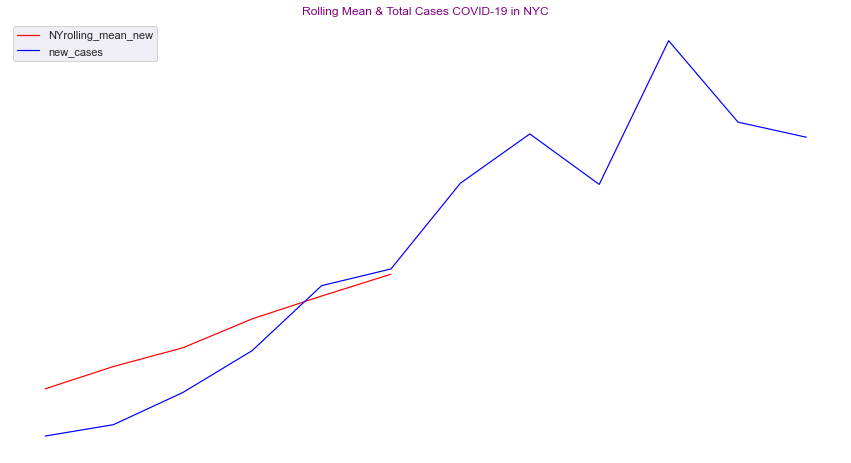

In [122]:
sns.set(rc={'figure.figsize':(15, 8)})


#
covidNY['NYrolling_mean_new'][15:].plot(linewidth=1.2, c='red');
covidNY['new_cases'][15:].plot(linewidth=1.2, c='blue');


#add title
plt.title('Rolling Mean & Total Cases COVID-19 in NYC', c='purple')

#add legend
plt.legend(loc="upper left")

#remove axis
plt.axis('off')

plt.show()


In [123]:
# for deaths: 

covidNY['NYrolling_mean_deaths'] = covidNY['new_deaths'].rolling(14, center=True).mean()
covidNY['NYrolling_mean_deaths'].tail()

<ipython-input-123-e391692589e6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covidNY['NYrolling_mean_deaths'] = covidNY['new_deaths'].rolling(14, center=True).mean()


1152   NaN
1206   NaN
1260   NaN
1314   NaN
1367   NaN
Name: NYrolling_mean_deaths, dtype: float64

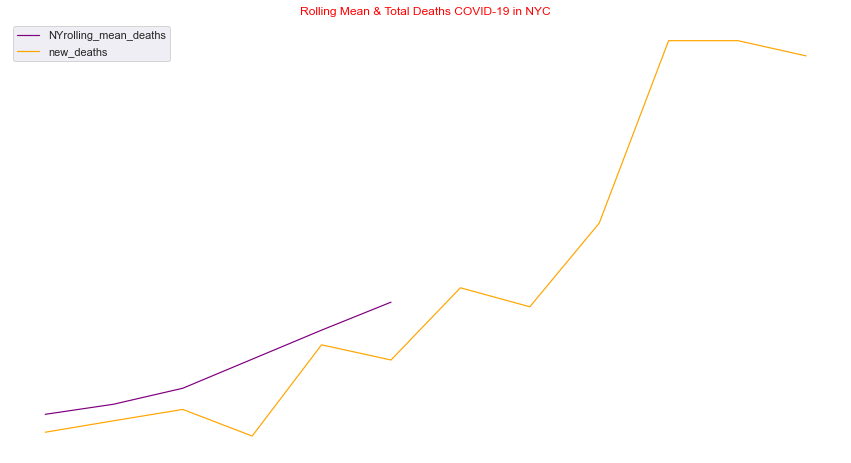

In [124]:
sns.set(rc={'figure.figsize':(15, 8)})


#
covidNY['NYrolling_mean_deaths'][15:].plot(linewidth=1.2, c='purple');
covidNY['new_deaths'][15:].plot(linewidth=1.2, c='orange');


#add title
plt.title('Rolling Mean & Total Deaths COVID-19 in NYC', c='red')

#add legend
plt.legend(loc="upper left")

#remove axis
plt.axis('off')

plt.show()


(189.95, 1423.05, -370.05, 7771.05)

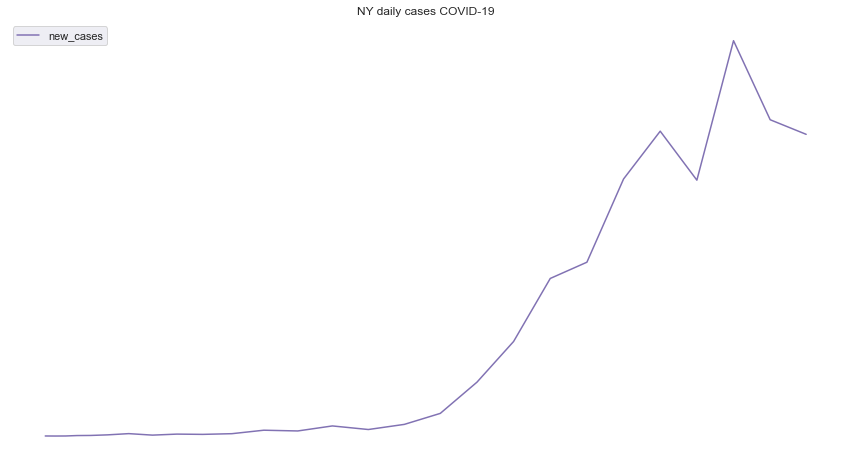

In [125]:
#covidNY['']

covidNY['new_cases'].plot(linewidth=1.5, c='m');
#covidNY['new_deaths'].plot(linewidth=1.5, c='C');

plt.title('NY daily cases COVID-19')

plt.legend(loc="upper left")
plt.axis('off')
#covidNY['cases'].plot(linewidth=0.5);

In [ ]:
covidNY['new_deaths'].plot(linewidth=1.5, c='C');
plt.title('NY daily deaths COVID-19')
plt.legend(loc="upper left")
plt.axis('off')
plt.show()

Conclusion: the bigger the data the better! Also, cummulative data isn't helpful for trend detection and time series analysis 